In [61]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [62]:
df = sns.load_dataset('mpg')

In [63]:
#Посчитайте количество строк и столбцов
rows, cols = df.shape
print(f'Количество строк {rows} и столбцов {cols}')


Количество строк 398 и столбцов 9


In [59]:
df_num = df.select_dtypes(include='number') 


for col in df_num:
    serie = df[col]
    print(f'Report for "{col}":')

    print(f'Доля пропусков {serie.isna().sum(axis=0) / serie.shape[0]}')
    print(f'Max: {serie.max()} Min: {serie.min()}')
    print(f'Mean: {serie.mean():.4f} Std: {serie.std():.4f}')
    print(f'Variance: {serie.var():.4f} Median: {serie.median()}')
    print(f'Quantile 0.1: {serie.quantile(0.1)} Quantile 0.9: {serie.quantile(0.9)}')
    print(f'Quartile 1: {serie.quantile(0.25):.3f} Quartile 3: {serie.quantile(0.75):.3f}')

    print('___________________________________')



Report for "mpg":
Доля пропусков 0.0
Max: 46.6 Min: 9.0
Mean: 23.5146 Std: 7.8160
Variance: 61.0896 Median: 23.0
Quantile 0.1: 14.0 Quantile 0.9: 34.33
Quartile 1: 17.500 Quartile 3: 29.000
___________________________________
Report for "cylinders":
Доля пропусков 0.0
Max: 8 Min: 3
Mean: 5.4548 Std: 1.7010
Variance: 2.8934 Median: 4.0
Quantile 0.1: 4.0 Quantile 0.9: 8.0
Quartile 1: 4.000 Quartile 3: 8.000
___________________________________
Report for "displacement":
Доля пропусков 0.0
Max: 455.0 Min: 68.0
Mean: 193.4259 Std: 104.2698
Variance: 10872.1992 Median: 148.5
Quantile 0.1: 90.0 Quantile 0.9: 350.0
Quartile 1: 104.250 Quartile 3: 262.000
___________________________________
Report for "horsepower":
Доля пропусков 0.0
Max: 230.0 Min: 46.0
Mean: 104.3040 Std: 38.2226
Variance: 1460.9691 Median: 93.5
Quantile 0.1: 67.0 Quantile 0.9: 155.90000000000003
Quartile 1: 76.000 Quartile 3: 125.000
___________________________________
Report for "weight":
Доля пропусков 0.0
Max: 5140 Min: 1

In [65]:
df_cat = df.select_dtypes(include='object')

for col in df_cat:
    print(f'Report for "{col}":')
    serie = df[col]
    print(f'Число уникальных: {len(serie.unique())}')
    print(f'Число пропусков: {serie.isna().sum() / df.shape[0]:.2f}')
    print(f'Мода: {serie.mode()[0]}')
    print('____________________')

Report for "origin":
Число уникальных: 3
Число пропусков: 0.00
Мода: usa
____________________
Report for "name":
Число уникальных: 305
Число пропусков: 0.00
Мода: ford pinto
____________________


In [66]:
#Cформулируйте и проверьте минимум 2 статистические гипотезы. Выбор критериев для проверки гипотез требуется обосновать. Сделать выводы в терминах предметной области.

# Выгляд логичным что чем больше масса автомобиля то и больше энергии нужно для движения (выше расход топлива)
#H0 расход(MPG) не зависит от веса
#H1 расход зависит от веса
#Используем тест хи-квадрат для теста на независимость двух переменных
from scipy.stats import chi2_contingency

x = df['weight']
y = df['mpg']

dep = [x, y]
statistic, p_value, *_ = chi2_contingency(dep)

if p_value > 0.05:
    print(f'{p_value:.2f} > 0.05. Не можем отвергнуть H0.')
else:
    print(f'{p_value:.2f} < 0.05. Отвергаем гипотезу H0 и принимаем Н1 что расход толива зависит от веса автомобиля')

0.00 < 0.05. Отвергаем гипотезу H0 и принимаем Н1 что расход толива зависит от веса автомобиля


14.963106796116506 29.28676470588235
Varinace for v8: 8.044507900247476, for r4 32.60588307736888
3.482499944007425e-91
Отвергаем нулевую гипотезу


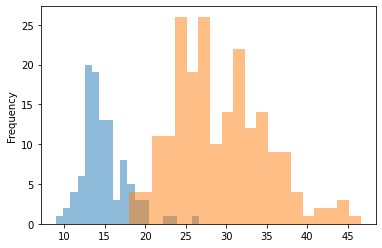

In [70]:
# Рассмотрим гипотезу что расход топлива будет выше у машин с V8 выше чем у машин с 4 цилиндрами
#H0 среднее значение расхода(MPG) одинаковое
#H1 среднее значение расхода для V8 больше чем для машин с 4 цилиндрами (MPG параметр меньше) 

from scipy.stats import ttest_ind

v8 = df[df['cylinders'] == 8]['mpg'] 
r4 = df[df['cylinders'] == 4]['mpg'] 


#visualise distribution
v8.plot.hist(bins=20, alpha=0.5)
r4.plot.hist(bins=20, alpha=0.5)

alpha=0.05

#Используем Т тест для проверки гипотезы
print(f'Varinace for v8: {v8.var()}, for r4 {r4.var()}')
#Так как дисперсия в двух группах сильно отличаются, используем параметр equal_var = False
results = ttest_ind(v8, r4, equal_var = False, alternative = 'less')

print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

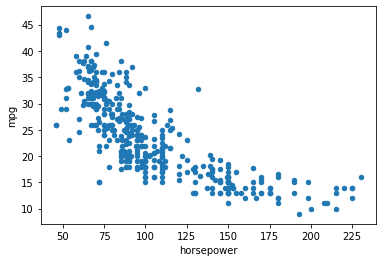

In [17]:
#Реализуйте стохастический и обычный градиентный спуск вручную,можно использовать ноутбук с лекции ссылка.Для этих данных:y=’mpg’ и x=’horsepower’ или ’weight’

#plot scatter for horsepower vs mpg 
df.plot.scatter(x = 'horsepower', y = 'mpg')

Параметры Регрессии: -0.15813423428539342, 40.0082464177931


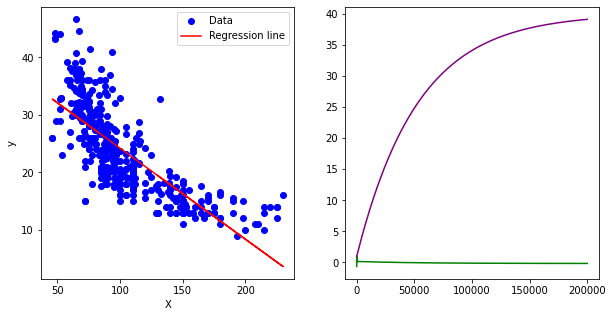

In [71]:
y = df['mpg'].to_numpy()
x = df['horsepower']
#x has na values, fill them with median values and convert to numpy
x.fillna(df['horsepower'].median(), inplace=True)
x = x.to_numpy()

#GD
np.random.seed(42)
lr = 0.00008  #with larger lr algorithm diverges =(
iterations = 500000
a = 1
b = 1

observations = len(x)

hist_a = []
hist_b = []

for i in range(iterations):
    y_pred = a * x + b
    err = y_pred - y

    a_gradient = 2 / observations * np.sum(x * err)
    b_gradient = 2 / observations * np.sum(err)

    a = a - lr * a_gradient
    b = b - lr * b_gradient

    hist_a.append(a)
    hist_b.append(b)

print(f'Параметры Регрессии: {a}, {b}')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, a * x + b, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_a[:200000], label='a', color='green')
plt.plot(hist_b[:200000], label='b', color='purple')

Параметры Регрессии: -0.17321015800379047, 38.06098365950562


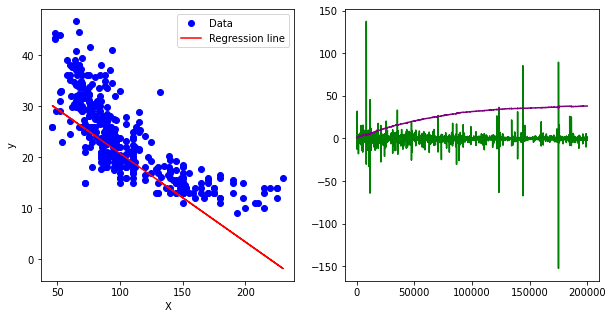

In [23]:
#Stochastic GD (SGD)

#initialise parameters
a = 1
b = 1

lr = 0.00006    #set lr less than GD

observations = len(x)

hist_a = []
hist_b = []

for i in range(200000):
    rand_index = np.random.randint(observations)
    x_i = x[rand_index]
    y_i = y[rand_index]
    y_pred = a * x_i + b
    error = y_pred - y_i
    a_gradient = 2 * x_i * error
    b_gradient = 2 * error
    a = a - lr * a_gradient
    b = b - lr * b_gradient

    hist_a.append(a)
    hist_b.append(b)

print(f'Параметры Регрессии: {a}, {b}')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, a * x + b, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_a[:200000], label='a', color='green')
plt.plot(hist_b[:200000], label='b', color='purple')